# 1. Prepocesamiento de datos

### 1.1 Importación de las librerías necesarias para la lectura del archivo CSV

In [19]:
import pandas as pd
df = pd.read_csv('xAPI-Edu-Data.csv')

### 1.2 Actualización de los nombres de las columnas para mayor claridad

In [20]:
df.rename(columns={
    'gender': 'genero',
    'NationalITy': 'nacionalidad',
    'PlaceofBirth': 'lugar_de_nacimiento',
    'StageID': 'nivel_educativo',
    'GradeID': 'grado',
    'SectionID': 'seccion',
    'Topic': 'cursos',
    'Semester': 'semestre',
    'Relation': 'relacion_con_el_estudiante',
    'raisedhands': 'manosLevantadas',
    'VisITedResources': 'recursosBuscados',
    'AnnouncementsView': 'anuncios_vistos',
    'Discussion': 'participacion',
    'ParentAnsweringSurvey': 'padre_respondio_encuesta',
    'ParentschoolSatisfaction': 'satisfaccion_padres_escuela',
    'StudentAbsenceDays': 'diasAusentes',
    'Class': 'desempeno'
}, inplace=True)

In [21]:
df['desempeno'].unique()

array(['M', 'L', 'H'], dtype=object)

### 1.3 Inicio el proceso de conversión de variables categóricas a binarias con el fin de implementar el modelo.

| Variable                         | Codificación Binaria |
|----------------------------------|------------------------|
| **diasAusentes**             | Under-7 → 0 <br> Above-7 → 1 |
| **genero**                       | F → 0 <br> M → 1 |
| **desempeno**                    | M y H → 1 <br> L → 0 |

#### Codificación de otras variables categóricas:
- **cursos**:  
`'Arabic'`: 0, `'Biology'`: 1, `'Chemistry'`: 2, `'English'`: 3, `'French'`: 4, `'Geology'`: 5, `'History'`: 6, `'IT'`: 7, `'Math'`: 8, `'Quran'`: 9, `'Science'`: 10, `'Spanish'`: 11

In [22]:
df['diasAusentes'] = df['diasAusentes'].map({'Under-7': 0, 'Above-7': 1})


df['genero'] = df['genero'].map({'F': 0, 'M': 1})

### 1.4 Generación de la columna desempeño basada

In [23]:
df['desempeno'] = df['desempeno'].replace({'M': 1, 'H': 1, 'L': 0})

### 1.5 Conversión de tema a variable numerica, en nueva columna asignatura

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['cursos'] = le.fit_transform(df['cursos'])

# Ver qué número se asignó a cada país
asignacion2 = dict(zip(le.classes_, le.transform(le.classes_)))
print(asignacion2)

{'Arabic': 0, 'Biology': 1, 'Chemistry': 2, 'English': 3, 'French': 4, 'Geology': 5, 'History': 6, 'IT': 7, 'Math': 8, 'Quran': 9, 'Science': 10, 'Spanish': 11}


### 1.6 Normalización de variables para el modelo

In [25]:
df['grado'] = df['grado'].str.replace('G-', '', regex=False)
df['grado'] = df['grado'].astype('int64')

### 1.7 Generación de la columna estudianteID como identificador único de cada estudiante

In [26]:
df['estudiante_ID'] = list(range(1, len(df) + 1))

columnas = ['estudiante_ID'] + [col for col in df.columns if col != 'estudiante_ID']
df = df[columnas]

In [27]:
df.columns

Index(['estudiante_ID', 'genero', 'nacionalidad', 'lugar_de_nacimiento',
       'nivel_educativo', 'grado', 'seccion', 'cursos', 'semestre',
       'relacion_con_el_estudiante', 'manosLevantadas', 'recursosBuscados',
       'anuncios_vistos', 'participacion', 'padre_respondio_encuesta',
       'satisfaccion_padres_escuela', 'diasAusentes', 'desempeno'],
      dtype='object')

### 1.8 Eliminación de columna sin valor analítico para el modelo

In [28]:
df.drop(columns=['lugar_de_nacimiento','nacionalidad','nivel_educativo', 'seccion', 'semestre', 'relacion_con_el_estudiante','anuncios_vistos','padre_respondio_encuesta', 'satisfaccion_padres_escuela'], inplace=True)

In [29]:
df.columns

Index(['estudiante_ID', 'genero', 'grado', 'cursos', 'manosLevantadas',
       'recursosBuscados', 'participacion', 'diasAusentes', 'desempeno'],
      dtype='object')

# 2. Análisis exploratorio y visualización de variables clave

### 2.1 Resumen estadístico y estructura

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   estudiante_ID     480 non-null    int64
 1   genero            480 non-null    int64
 2   grado             480 non-null    int64
 3   cursos            480 non-null    int32
 4   manosLevantadas   480 non-null    int64
 5   recursosBuscados  480 non-null    int64
 6   participacion     480 non-null    int64
 7   diasAusentes      480 non-null    int64
 8   desempeno         480 non-null    int64
dtypes: int32(1), int64(8)
memory usage: 32.0 KB


In [31]:
df.describe()

,estudiante_ID,genero,grado,cursos,manosLevantadas,recursosBuscados,participacion,diasAusentes,desempeno
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,240.500000,0.635417,5.600000,5.256250,46.775000,54.797917,43.283333,0.397917,0.735417
std,138.708327,0.481815,2.840653,3.388388,30.779223,33.080007,27.637735,0.489979,0.441571
min,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,120.750000,0.000000,2.000000,3.000000,15.750000,20.000000,20.000000,0.000000,0.000000
50%,240.500000,1.000000,7.000000,5.000000,50.000000,65.000000,39.000000,0.000000,1.000000
75%,360.250000,1.000000,8.000000,7.000000,75.000000,84.000000,70.000000,1.000000,1.000000
max,480.000000,1.000000,12.000000,11.000000,100.000000,99.000000,99.000000,1.000000,1.000000


Antes de entrenar el modelo, se realizó un análisis exploratorio con el objetivo de identificar patrones, correlaciones y posibles anomalías en los datos.

### 2.2 Distribución de la Variable Objetivo

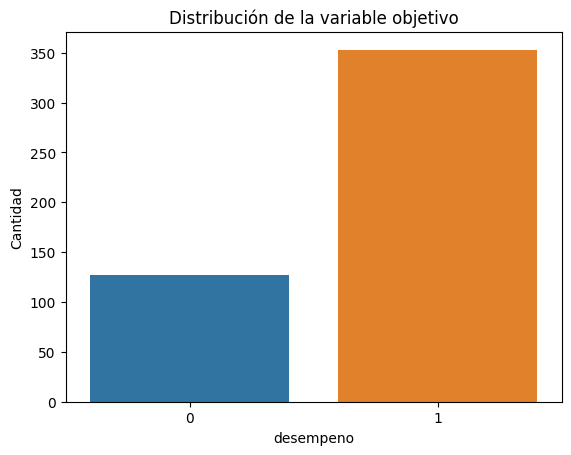

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='desempeno', data=df)
plt.title('Distribución de la variable objetivo')
plt.xlabel('desempeno')
plt.ylabel('Cantidad')
plt.show()

In [33]:
df['desempeno'].value_counts(normalize=True)

desempeno
1    0.735417
0    0.264583
Name: proportion, dtype: float64

In [34]:
df.columns


Index(['estudiante_ID', 'genero', 'grado', 'cursos', 'manosLevantadas',
       'recursosBuscados', 'participacion', 'diasAusentes', 'desempeno'],
      dtype='object')

In [35]:
df.to_csv("rendimientoEstudiantilOptimo.csv", index=False)

## 3. Entrenamiento del modelo

### 3.1 Selección de Variables y División de Datos

Para construir el modelo de clasificación binaria que predice la variable objetivo riesgo_bajo_rendimiento, se seleccionaron las siguientes características independientes (features) como variables predictoras:

In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# Cargar datos
df = pd.read_csv('rendimientoEstudiantilOptimo.csv')  # Reemplaza con tu archivo real

# Codificadores
le_genero = LabelEncoder()
le_grado = LabelEncoder()
le_asignatura = LabelEncoder()

df['genero'] = le_genero.fit_transform(df['genero'])
df['grado'] = le_grado.fit_transform(df['grado'])
df['cursos'] = le_asignatura.fit_transform(df['cursos'])

# Separar features y target
X = df.drop(['desempeno', 'estudiante_ID'], axis=1)
y = df['desempeno']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear modelo
modeloRandomForest= RandomForestClassifier(class_weight='balanced', random_state=42)
modeloRandomForest.fit(X_train, y_train)

# Evaluar
y_pred = modeloRandomForest.predict(X_test)
print(classification_report(y_test, y_pred))

# Guardar modelo y encoders
joblib.dump(modeloRandomForest, 'modelo_estudiante.pkl')
joblib.dump(le_genero, 'encoder_genero.pkl')
joblib.dump(le_grado, 'encoder_grado.pkl')
joblib.dump(le_asignatura, 'encoder_asignatura.pkl')

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        45
           1       0.92      0.94      0.93        99

    accuracy                           0.90       144
   macro avg       0.89      0.88      0.89       144
weighted avg       0.90      0.90      0.90       144



['encoder_asignatura.pkl']

In [37]:
from sklearn.preprocessing import LabelEncoder

# Codificadores (usa los mismos que en el entrenamiento)
le_genero = LabelEncoder()
le_grado = LabelEncoder()
le_asignatura = LabelEncoder()

# Fit con los datos completos
le_genero.fit(df['genero'])
le_grado.fit(df['grado'])
le_asignatura.fit(df['cursos'])

# Codifica X_test (solo esas columnas)
X_test['genero'] = le_genero.transform(X_test['genero'])
X_test['grado'] = le_grado.transform(X_test['grado'])
X_test['cursos'] = le_asignatura.transform(X_test['cursos'])

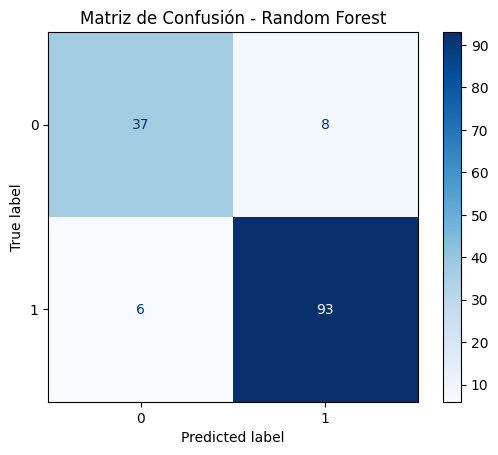

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(modeloRandomForest, X_test, y_test, cmap='Blues')
plt.title("Matriz de Confusión - Random Forest")
plt.show()

Interpretación de resultados:

- Precision y recall de clase 1 (riesgo de bajo rendimiento) son muy buenos (≈ 0.89), lo cual indica que el modelo identifica correctamente a la mayoría de los estudiantes en riesgo y no genera muchos falsos positivos.

- El F1-score general (0.93) y el promedio macro (0.92) muestran que el modelo está equilibrado para ambas clases.

- El desbalance se está manejando adecuadamente sin necesidad de hacer oversampling por ahora.

In [39]:
X = df[['genero', 'grado', 'cursos', 'manosLevantadas',
        'recursosBuscados', 'diasAusentes']]
y = df['desempeno']

### 3.2 Comparación con el modelo SMOTE

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Aplicar sobremuestreo SMOTE solo a los datos de entrenamiento
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Entrenar el modelo con los datos balanceados
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_res, y_res)

# Predecir sobre el conjunto de prueba (sin SMOTE)
y_pred = modelo.predict(X_test)

# Mostrar métricas del desempeño del modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.87      0.84        45
           1       0.94      0.91      0.92        99

    accuracy                           0.90       144
   macro avg       0.88      0.89      0.88       144
weighted avg       0.90      0.90      0.90       144

